In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import date

In [51]:
df = pd.read_csv("D:\efrei\cours\s7\machine learning\lab2\donnees-hospitalieres-covid19-2020-11-17-19h00.csv", delimiter = ';')

In [52]:
df[df['hosp'] == df['hosp'].max()]

,dep,sexe,jour,hosp,rea,rad,dc
8406,75,0,2020-04-14,3281,790,2336,1003


In [53]:
df_day = df[df.sexe == 0].groupby(df['jour']).sum()
df_day[df_day.hosp == df_day.hosp.max()]

,sexe,hosp,rea,rad,dc
jour,,,,,
2020-11-16,0,33466,4903,140849,31291


In [54]:
df_day = df[df.sexe == 0].groupby(df['jour']).sum()
df_day[df_day.rea == df_day.rea.max()]

,sexe,hosp,rea,rad,dc
jour,,,,,
2020-04-08,0,30217,7019,21253,7632


In [55]:
df_day = df[df['sexe']==0].groupby(['jour']).sum()
df_day['death'] = df_day.dc.diff()
df_day[df_day.death == df_day.death.max()]

,sexe,hosp,rea,rad,dc,death
jour,,,,,,
2020-04-06,0,29569,6948,17249,6494,605.0


<AxesSubplot:xlabel='jour'>

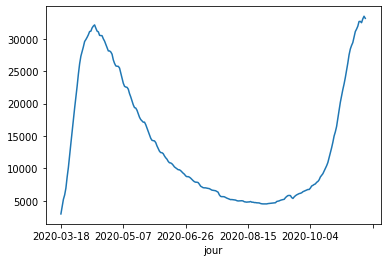

In [30]:
df_day.hosp.plot()

<AxesSubplot:xlabel='jour'>

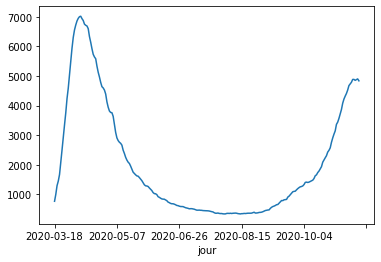

In [31]:
df_day.rea.plot()

<AxesSubplot:xlabel='jour'>

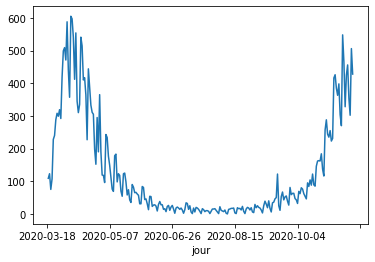

In [32]:
df_day.death.plot()

<AxesSubplot:xlabel='jour'>

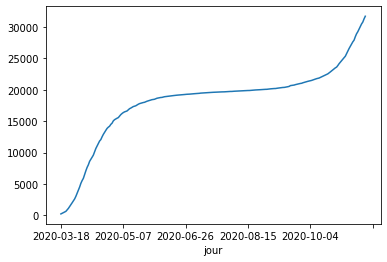

In [33]:
df_day.dc.plot()

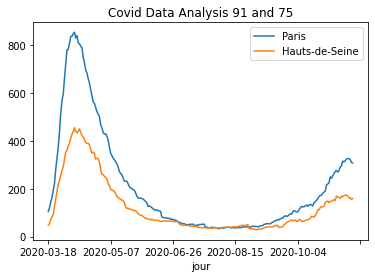

In [34]:
df_dep92 = df[df['dep'] == '92']
df_dep92 = df_dep92[df_dep92['sexe'] == 0].groupby(df_dep92.jour).sum()
df_dep75 = df[df['dep'] == '75']
df_dep75 = df_dep75[df_dep75['sexe'] == 0].groupby(df_dep75.jour).sum()

df_dep75.rea.plot()
df_dep92.rea.plot()
plt.legend(['Paris', 'Hauts-de-Seine'])
plt.title('Covid Data Analysis 91 and 75')
plt.show()

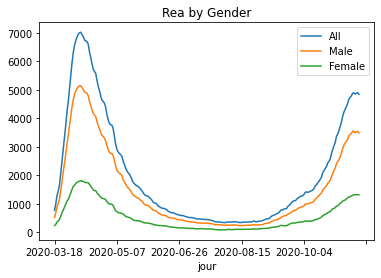

In [35]:
df_reaA = df[df['sexe'] == 0].groupby(df['jour']).sum()
df_reaH = df[df['sexe'] == 1].groupby(df['jour']).sum()
df_reaF = df[df['sexe'] == 2].groupby(df['jour']).sum()

df_reaA.rea.plot()
df_reaH.rea.plot()
df_reaF.rea.plot()
plt.legend(['All', 'Male', 'Female'])
plt.title('Rea by Gender')
plt.show()

In [36]:
df_reaA.head()

,sexe,hosp,rea,rad,dc
jour,,,,,
2020-03-18,0,2972,771,816,218
2020-03-19,0,4073,1002,1180,327
2020-03-20,0,5226,1297,1587,450
2020-03-21,0,5900,1453,1811,525
2020-03-22,0,6954,1674,2117,632


<AxesSubplot:xlabel='{Males, All, Females}'>

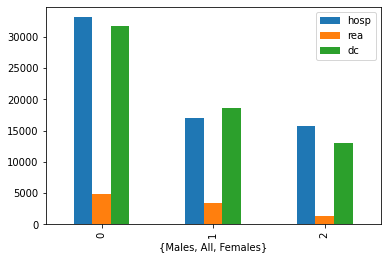

In [37]:
df_last = df[df.jour == df.jour.max()].groupby(df.sexe).sum()
df_last[['hosp', 'rea', 'dc']].plot(kind = 'bar', xlabel={'All', 'Males', 'Females'})

<AxesSubplot:ylabel='hosp'>

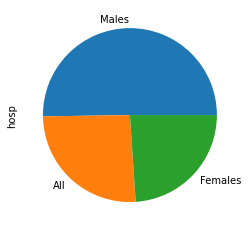

In [38]:
df_last.hosp.plot(kind = 'pie', labels = {'All', 'Males', 'Females'})

In [39]:
df_day['day'] = df_day.index
x = date.fromisoformat('2020-03-18')
first_day = date.toordinal(x)

In [56]:
def date_to_ordinal(x):
    y = date.fromisoformat(x)
    return date.toordinal(y) - first_day

In [57]:
df_day['counter'] = df_day.day.map(date_to_ordinal)
df_day.head()

AttributeError: 'DataFrame' object has no attribute 'day'

In [58]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(df_day.counter.to_numpy(), df_day.dc.to_numpy())
df_day.dc.plot()
df_day.counter.map(lambda e: intercept + slope * e).plot()
plt.legend(['Real', 'Simulation'])
plt.show()

AttributeError: 'DataFrame' object has no attribute 'counter'

In [59]:
p3 = np.poly1d(np.polyfit(df_day.counter.to_numpy(), df_day.dc.to_numpy(), deg = 5))

AttributeError: 'DataFrame' object has no attribute 'counter'

AttributeError: 'DataFrame' object has no attribute 'counter'

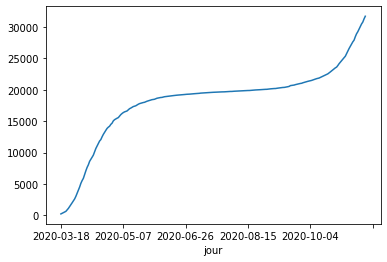

In [60]:
df_day.dc.plot()
df_day.counter.map(lambda e: p3(e)).plot()
plt.legend(['Real', 'Simulation'])
plt.show()

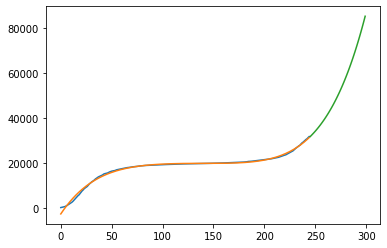

In [45]:
plt.plot(df_day.counter.to_numpy(), df_day.dc.to_numpy())
plt.plot(df_day.counter.to_numpy(), df_day.counter.map(lambda e:p3(e)))
d=np.arange(df_day.counter[-1]+1, 300, 1)
plt.plot(d, p3(d))
plt.show()

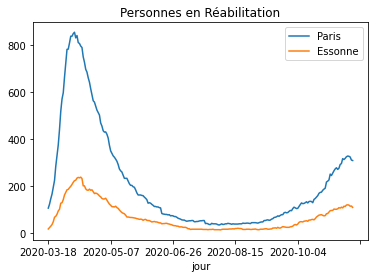

In [46]:
# Essonne
df91 = df[df['dep'] == '91']
df91 = df91[df91['sexe'] == 0].groupby(df91.jour).sum()
df91['death'] = df91.dc.diff()

# Paris
df75 = df[df['dep'] == '75']
df75 = df75[df75['sexe'] == 0].groupby(df75.jour).sum()


df75.rea.plot()
df91.rea.plot()
plt.legend(['Paris', 'Essonne'])
plt.title('Personnes en Réabilitation')
plt.show()

In [47]:
df91[df91.death == df91.death.max()]

,sexe,hosp,rea,rad,dc,death
jour,,,,,,
2020-09-18,0,232,23,2842,637,76.0


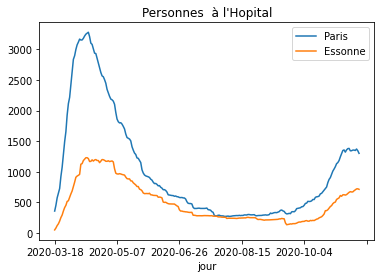

In [48]:
df75.hosp.plot()
df91.hosp.plot()
plt.legend(['Paris', 'Essonne'])
plt.title('Personnes  à l\'Hopital')
plt.show()

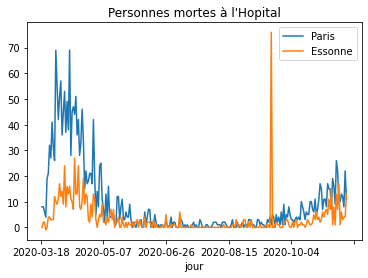

In [49]:
df75['death'] = df75.dc.diff()
df75.death.plot()
df91['death'] = df91.dc.diff()
df91.death.plot()
plt.legend(['Paris', 'Essonne'])
plt.title('Personnes mortes à l\'Hopital')
plt.show()